<a href="https://colab.research.google.com/github/zaidafreedi/Flight-Price-Prediction/blob/main/Flight_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> **Data Collection**
---

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
train_data=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")

In [106]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


> **Data Exploration**
 ---

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [108]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [109]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

> **Data Preprocessing**
 ---

In [110]:
train_data.dropna(inplace=True)

In [111]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [112]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [113]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [114]:
data=train_data.copy()

In [115]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [116]:
from datetime import timedelta

In [117]:
data['Dep_Time'] = pd.to_datetime(data['Date_of_Journey'] + " " + data['Dep_Time'], format="%d/%m/%Y %H:%M")

In [118]:
data['Duration_Hour'] = data['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
data['Duration_Minute'] = data['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)
data['Total_Duration_Min']=data['Duration_Hour']*60+data['Duration_Minute']
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hour,Duration_Minute,Total_Duration_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,23:30,5h 25m,1 stop,No info,6218,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,22:25,2h 30m,non-stop,No info,4107,2,30,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,23:20,2h 35m,non-stop,No info,4145,2,35,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,11:20,3h,non-stop,No info,7229,3,0,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,14:10,2h 40m,non-stop,No info,12648,2,40,160


In [119]:
data['Duration'] = data.apply(lambda row: timedelta(hours=row['Duration_Hour'], minutes=row['Duration_Minute']), axis=1)
data['Duration']

0       0 days 02:50:00
1       0 days 07:25:00
2       0 days 19:00:00
3       0 days 05:25:00
4       0 days 04:45:00
              ...      
10678   0 days 02:30:00
10679   0 days 02:35:00
10680   0 days 03:00:00
10681   0 days 02:40:00
10682   0 days 08:20:00
Name: Duration, Length: 10682, dtype: timedelta64[ns]

In [120]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

In [121]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month
data['Journey_year']=data['Date_of_Journey'].dt.year

In [122]:
data['Arrival_Time']=data['Dep_Time']+data['Duration']

In [123]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hour,Duration_Minute,Total_Duration_Min,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,2,50,170,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,7,25,445,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,0 days 19:00:00,2 stops,No info,13882,19,0,1140,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,0 days 05:25:00,1 stop,No info,6218,5,25,325,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,4,45,285,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,0 days 02:30:00,non-stop,No info,4107,2,30,150,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,2,35,155,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,3,0,180,27,4,2019
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,2,40,160,1,3,2019


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Airline             10682 non-null  object         
 1   Date_of_Journey     10682 non-null  datetime64[ns] 
 2   Source              10682 non-null  object         
 3   Destination         10682 non-null  object         
 4   Route               10682 non-null  object         
 5   Dep_Time            10682 non-null  datetime64[ns] 
 6   Arrival_Time        10682 non-null  datetime64[ns] 
 7   Duration            10682 non-null  timedelta64[ns]
 8   Total_Stops         10682 non-null  object         
 9   Additional_Info     10682 non-null  object         
 10  Price               10682 non-null  int64          
 11  Duration_Hour       10682 non-null  int64          
 12  Duration_Minute     10682 non-null  int64          
 13  Total_Duration_Min  10682 non-n

In [125]:
def extract_hour_min(df,col):
    df[col+'_Hour']=df[col].dt.hour
    df[col+'_Minute']=df[col].dt.minute
    return df

In [126]:
data=extract_hour_min(data,'Dep_Time')
data=extract_hour_min(data,'Arrival_Time')

In [127]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_Hour', 'Duration_Minute',
       'Total_Duration_Min', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_Time_Hour', 'Dep_Time_Minute', 'Arrival_Time_Hour',
       'Arrival_Time_Minute'],
      dtype='object')

In [128]:
col_to_drop=['Arrival_Time','Dep_Time']
data.drop(col_to_drop,axis=1,inplace=True)

In [129]:
order=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops','Additional_Info', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_Hour','Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute','Duration_Hour', 'Duration_Minute','Total_Duration_Min']
data=data[order]
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,0 days 02:30:00,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,0 days 02:35:00,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,0 days 03:00:00,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0,180
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,0 days 02:40:00,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


> **Data Analysis**
---

**Anlaysis of Departure Time**

In [130]:
time_slots = {
    'Early Morning': (4, 8),    # 04:00 - 07:59
    'Morning': (8, 12),         # 08:00 - 11:59
    'Noon': (12, 16),           # 12:00 - 15:59
    'Evening': (16, 20),        # 16:00 - 19:59
    'Night': (20, 24),          # 20:00 - 23:59
    'Late Night': (0, 4)        # 00:00 - 03:59
}

In [131]:
def Slot_Category(Dep_Hour):
    for Slot,(Start_Hour,End_Hour) in time_slots.items():
        if Start_Hour<=Dep_Hour<End_Hour:
            return Slot

In [132]:
data['Dep_Time_Hour'].apply(Slot_Category).value_counts()

Morning          2728
Early Morning    2353
Evening          2178
Night            1691
Noon             1437
Late Night        295
Name: Dep_Time_Hour, dtype: int64

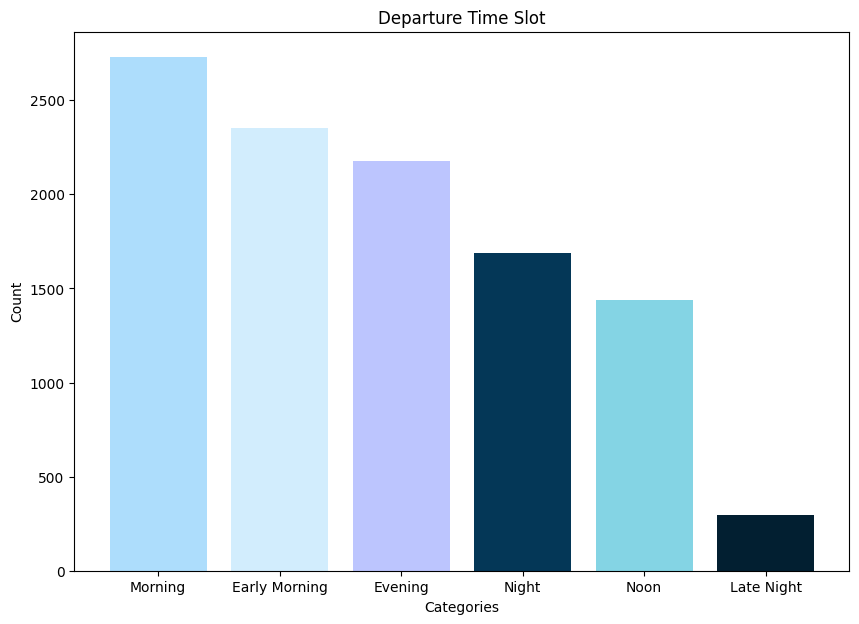

In [133]:
plt.figure(figsize=(10,7),dpi=100)
cus=['#adddfc','#d2edfd','#bcc5fe','#043757','#84d4e4','#021f31']
plt.bar(data['Dep_Time_Hour'].apply(Slot_Category).value_counts().index, data['Dep_Time_Hour'].apply(Slot_Category).value_counts().values,color=cus)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Departure Time Slot')
plt.show()

**Analysis of impact of Duration in price**

<Figure size 1000x500 with 0 Axes>

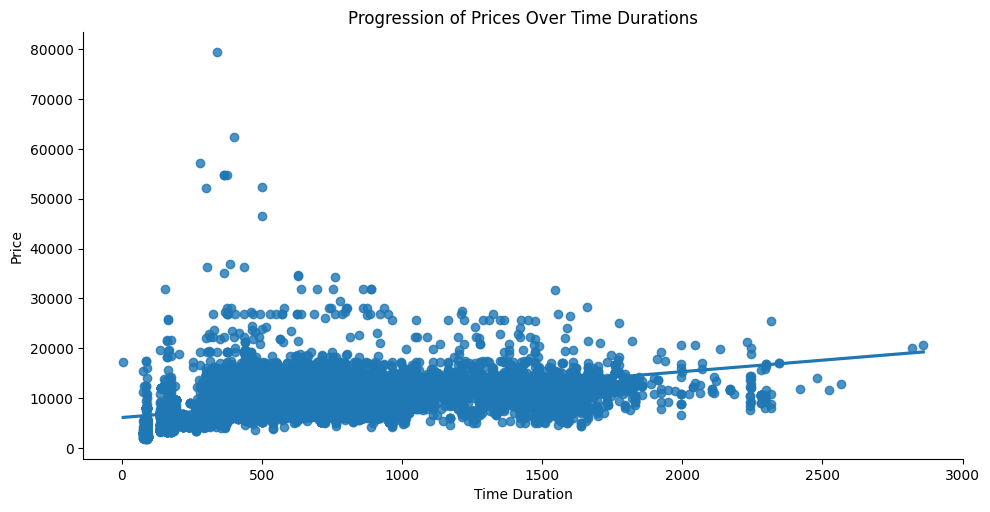

In [134]:
import warnings

# Ignore the SettingWithCopyWarning
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.lmplot(x='Total_Duration_Min',y='Price',data=data,aspect=2)
plt.title('Progression of Prices Over Time Durations')
plt.xlabel('Time Duration')
plt.ylabel('Price')
plt.show()

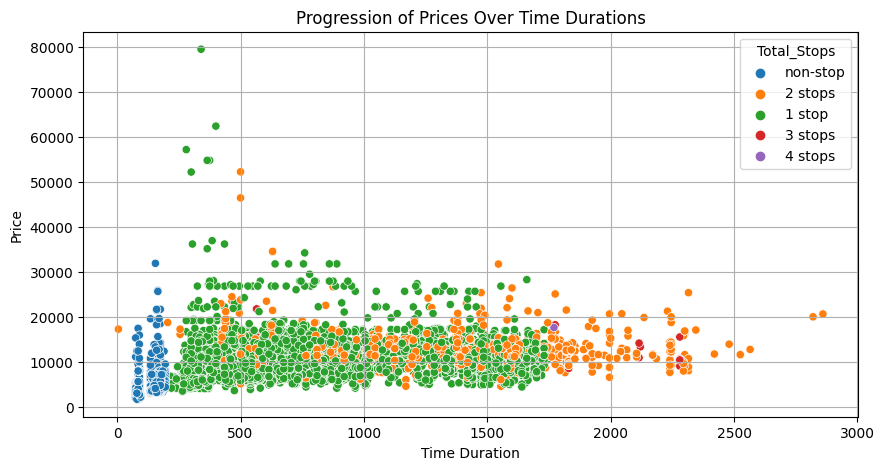

In [135]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Total_Duration_Min'],y=data['Price'],hue=data['Total_Stops'], marker='o')
plt.title('Progression of Prices Over Time Durations')
plt.xlabel('Time Duration')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Non stop flights take duration while their fare is also low, as the stops increases duration also increase and price could also increase

**Analysis of Jet Airways Route**

In [136]:
ja=data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

In [137]:
ja.head(25)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
dtype: int64

**Airline vs Price Analysis**

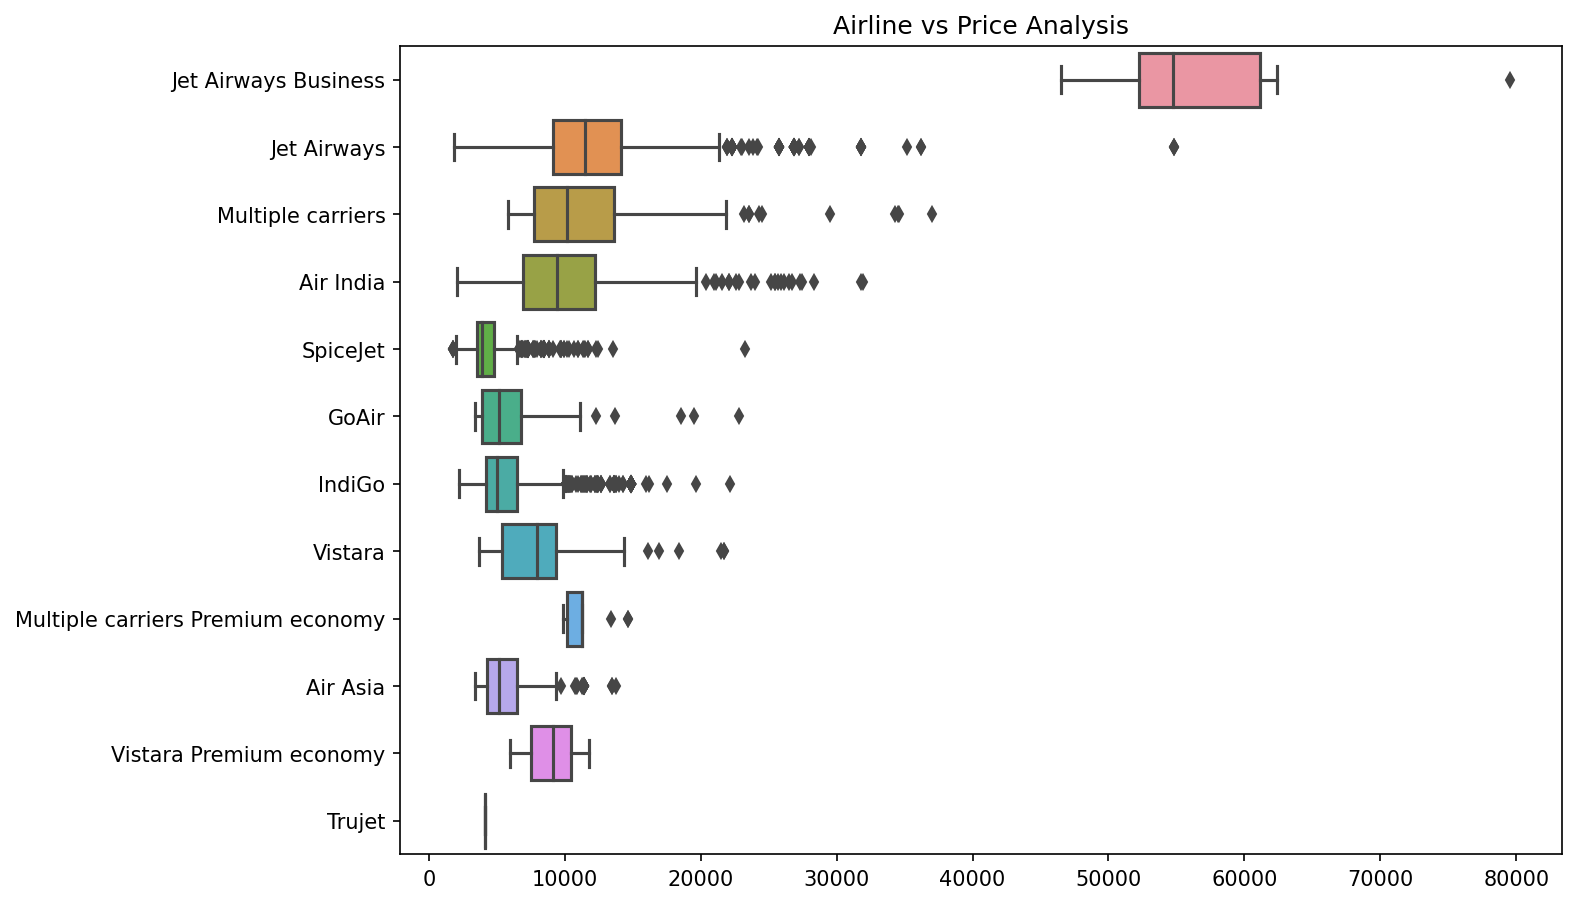

In [138]:
plt.figure(figsize=(10,7),dpi=150)
sns.boxplot(x='Price',y='Airline',data=data.sort_values('Price',ascending=False))
plt.title('Airline vs Price Analysis')
plt.xlabel('')
plt.ylabel('')
plt.show()

> **Feature Engineering**
---

In [139]:
data['Source'].nunique()

5

In [140]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [141]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [142]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [143]:
num_col

['Date_of_Journey',
 'Duration',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Duration_Hour',
 'Duration_Minute',
 'Total_Duration_Min']

In [144]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

> One hot Encoding
---

In [145]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category]=data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [146]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,0 days 02:30:00,non-stop,No info,4107,9,...,22,25,2,30,150,0,1,0,0,0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,0 days 02:35:00,non-stop,No info,4145,27,...,23,20,2,35,155,0,1,0,0,0
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,0 days 03:00:00,non-stop,No info,7229,27,...,11,20,3,0,180,1,0,0,0,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,0 days 02:40:00,non-stop,No info,12648,1,...,14,10,2,40,160,1,0,0,0,0


> Target guided mean encoding
---

In [147]:
airlines=data.groupby('Airline')['Price'].mean().sort_values()

In [148]:
airlines

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [149]:
Airlines_dic={key:index for index,key in enumerate(airlines.index,0)}
''' OR
Airline_dic={}
for airline,prior in zip(airline.index,range(len(airline))):
    Airline_dic[airline]=prior
'''

' OR\nAirline_dic={}\nfor airline,prior in zip(airline.index,range(len(airline))):\n    Airline_dic[airline]=prior\n'

In [150]:
Airlines_dic

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [151]:
data['Airline']=data['Airline'].map(Airlines_dic)

In [152]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [153]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [154]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [155]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [156]:
des=data.groupby(['Destination'])['Price'].mean().sort_values().index
des

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [157]:
des_dic={key:index for index,key in enumerate(des,0)}

In [158]:
des_dic

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [159]:
data['Destination']=data['Destination'].map(des_dic)

In [160]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,0 days 19:00:00,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,0 days 05:25:00,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,0 days 04:45:00,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


> Manual Encoding
---

In [161]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

Since it is a Ordinal data we can use label Encoding which can be easily done using sklearn package

Without using sklearn

In [162]:
stop_dic={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [163]:
data['Total_Stops']=data['Total_Stops'].map(stop_dic)

In [164]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,0 days 02:50:00,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,0 days 07:25:00,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,0 days 19:00:00,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


>Removing Unnecessary data
---

In [165]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hour',
       'Duration_Minute', 'Total_Duration_Min', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [166]:
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [167]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,0 days 02:50:00,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,0 days 07:25:00,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,0 days 19:00:00,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [168]:
data['Journey_year'].unique()

array([2019])

* Since most of the values are not available or it doesn't have any info in the Additonal Info col so it can be dropped
* Route feature is a duplicate and can also be droped since Total Stops contain the information about stops
* Total_Duration_min, Source, Date_of_journey can also be dropped since we have already extracted information from those col
* Journey year col have constant so it can be dropped


In [169]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hour',
       'Duration_Minute', 'Total_Duration_Min', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [170]:
data.drop(columns=['Date_of_Journey','Route','Additional_Info','Source','Journey_year','Duration','Total_Duration_Min'],axis=1,inplace=True)

In [171]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [172]:
data['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

>Outlier Detection
---

In [173]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))  # Added figsize for adjusting the plot size

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(x=df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

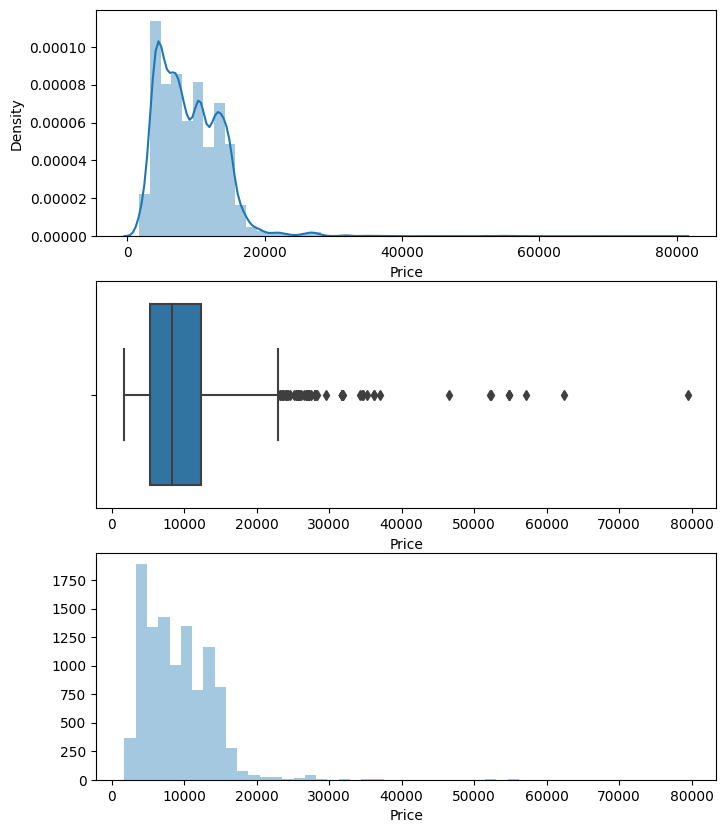

In [174]:
plot(data,'Price')

In the first dist graph the graph is skewed towards right side so we can use Inter Quartile Range (IQR)

In [175]:
q3=data['Price'].quantile(0.75)
q1=data['Price'].quantile(0.25)

iqr= q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [176]:
print(maximum)

23017.0


In [177]:
print(minimum)

-5367.0


In [178]:
print(len([price for price in data['Price'] if price > maximum or price < minimum]))

94


Why replace the outliers with median and not mean
Mean is badly when we have outliers but median will not be affected with outliers

In [179]:
data['Price']=data['Price'].apply(lambda x:np.where(x>=maximum or x<=minimum, data['Price'].median(), x))

In [180]:
print(len([price for price in data['Price'] if price > maximum or price < minimum]))

0


> Feature Selection

---

Mututal Information
* Whether two features (Random Variable) are related to each other or not calculate the dependecy of target variable on the each features
* It will return with non negative value which measures the dependency of two variable
* if MI =0, then they are completely independent and when MI = 1, then they have high dependency

In [181]:
y = data['Price']

In [182]:
X = data.drop(['Price'],axis=1)

In [183]:
from sklearn.feature_selection import mutual_info_regression

In [184]:
imp=mutual_info_regression(X,y)

In [185]:
imp_df=pd.DataFrame(imp, index= X.columns)

In [186]:
imp_df.columns=['Importance']

In [187]:
imp_df

,Importance
Airline,0.968696
Destination,0.989253
Total_Stops,0.801698
Journey_day,0.220135
Journey_month,0.622493
Dep_Time_Hour,0.337477
Dep_Time_Minute,0.264685
Arrival_Time_Hour,0.406063
Arrival_Time_Minute,0.343869
Duration_Hour,0.460289


In [188]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Destination,0.989253
Airline,0.968696
Total_Stops,0.801698
Journey_month,0.622493
Source_Delhi,0.522991
Duration_Hour,0.460289
Source_Kolkata,0.458260
Arrival_Time_Hour,0.406063
Source_Banglore,0.383037
Duration_Minute,0.344878


Since we don't have high number of features and each features have their own contribution hence droping these features makes no sense

> Model Building
---

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [191]:
from sklearn.ensemble import RandomForestRegressor

In [192]:
ml_model=RandomForestRegressor()

In [193]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [194]:
y_pred=ml_model.predict(X_test)

In [195]:
y_pred

array([16703.87,  5277.52,  8902.48, ...,  3520.63,  6260.58,  6902.07])

In [196]:
from sklearn import metrics

In [197]:
metrics.r2_score(y_test,y_pred)

0.7950048318428569

In [198]:
import pickle

In [199]:
file=open(r'C:\Users\LENOVO\Jupyter Notebook\Flight EDA & Price Prediction\rf_random.pkl','wb')

In [200]:
pickle.dump(ml_model,file)
file.close()

In [201]:
model =open(r'C:\Users\LENOVO\Jupyter Notebook\Flight EDA & Price Prediction\rf_random.pkl','rb')

In [202]:
forest=pickle.load(model)
model.close()

In [203]:
y_pred2 =forest.predict(X_test)

In [204]:
metrics.r2_score(y_test,y_pred2)

0.7950048318428569